In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.patches as mpatches
import numpy as np
import folium
from folium import plugins
from folium.plugins import MarkerCluster

cities_df = pd.read_csv('../data/cities.csv')
lines_df = pd.read_csv('../data/lines.csv')
station_lines_df = pd.read_csv('../data/station_lines.csv')
stations_df = pd.read_csv('../data/stations.csv')
systems_df= pd.read_csv('../data/systems.csv')
track_lines_df = pd.read_csv('../data/track_lines.csv')
track_df = pd.read_csv('../data/tracks.csv')



In [44]:
#Data Cleaning Cities DF
cities_df["city_long"] = cities_df["coords"].apply(lambda x: x.split('POINT(')[1].split(' ')[0])
cities_df["city_lat"] = cities_df["coords"].apply(lambda x: x.split('POINT(')[1].split(' ')[1].split(")")[0])
cities_df["start_year"] = cities_df["start_year"].fillna(0)
cities_df["city_id"] = cities_df["id"]
cities_df["city_name"] = cities_df["name"]
cities_df["city_url_name"] = cities_df["url_name"]
cities_df = cities_df.drop(["country_state", "coords", "id", "name", "url_name"], axis = 1)
cities_df.head(5)

,start_year,country,city_long,city_lat,city_id,city_name,city_url_name
0,2017.0,Scotland,-2.15,57.15,5,Aberdeen,aberdeen
1,2017.0,Australia,138.6,-34.91666667,6,Adelaide,adelaide
2,2017.0,Algeria,3,36.83333333,7,Algiers,algiers
3,2017.0,Turkey,32.91666667,39.91666667,9,Ankara,ankara
4,2017.0,Brazil,-48.48333333,-1.466666667,16,Belém,belem


In [45]:
#Data Cleaning
lines_df["lines_id"] = lines_df['id']
lines_df["lines_name"] = lines_df["name"]
lines_df["lines_url_name"] = lines_df["url_name"]
lines_df = lines_df.drop(["id", "name", "url_name"], axis = 1)

merged_line_city = pd.merge(lines_df, cities_df[["city_id","city_name","country"]], on="city_id", how ="left")
merged_line_city.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_id            1343 non-null   int64  
 1   color              1343 non-null   object 
 2   system_id          1343 non-null   int64  
 3   transport_mode_id  926 non-null    float64
 4   lines_id           1343 non-null   int64  
 5   lines_name         1343 non-null   object 
 6   lines_url_name     1343 non-null   object 
 7   city_name          1343 non-null   object 
 8   country            1343 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 94.6+ KB


In [46]:
#Data Cleaning

station_lines_df["station_lines_id"] = station_lines_df["id"]
station_lines_df = station_lines_df.drop(["id"], axis = 1)
merged_l_c_stl_df = pd.merge(station_lines_df, merged_line_city, on="city_id", how="left")
stations_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15794 entries, 0 to 15793
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15794 non-null  int64  
 1   name        14248 non-null  object 
 2   geometry    15794 non-null  object 
 3   buildstart  14342 non-null  float64
 4   opening     15721 non-null  float64
 5   closure     15713 non-null  float64
 6   city_id     15794 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 863.9+ KB


In [47]:

stations_df["stations_name"] = stations_df["name"]
stations_df["stations_id"] = stations_df["id"]
stations_df["stations_long"] = stations_df["geometry"].apply(lambda x: x.split('POINT(')[1].split(' ')[0])
stations_df["stations_lat"] = stations_df["geometry"].apply(lambda x: x.split('POINT(')[1].split(' ')[1].split(")")[0])

stations_df = stations_df.drop(["id", "name","geometry"], axis = 1)

#merged_l_c_stl_st_df = pd.merge(stations_df, merged_l_c_stl_df, on="city_id", how="left")
#merged_l_c_stl_st_df



In [48]:
#Data Cleaning



In [49]:
#map London
London = stations_df[stations_df["city_id"]==69]
london_lat = cities_df[cities_df["city_id"] == 69]["city_lat"]
london_long = cities_df[cities_df["city_id"] == 69]["city_long"]
Lat = london_lat.iloc[0]
Long = london_long.iloc[0]


london_map=folium.Map([Lat,Long],zoom_start=12)

# 2. Create the MarkerCluster and add it to the map
marker_cluster = MarkerCluster().add_to(london_map)

# 3. Add markers to the *MarkerCluster*
for lat, lon, label in zip(London.stations_lat, London.stations_long, London.stations_name):
    folium.Marker(location=[lat, lon], popup=label).add_to(marker_cluster)

london_map

#fig = px.scatter_geo(cities_df, 
#                     lat='Lat', 
#                     lon='Long',
#                     hover_name='name', 
#                     projection='natural earth',
#                     title=' Map')
#fig.show()




stations_tokyo_2000=stations[stations['city_id']==114][0:2000]
Long=139.75
Lat=35.67
tokyo_map=folium.Map([Lat,Long],zoom_start=12)

tokyo_stations_map=plugins.MarkerCluster().add_to(tokyo_map)
for lat,lon,label in zip(stations_tokyo_2000.Lat,stations_tokyo_2000.Long,stations_tokyo_2000.stations_name):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(tokyo_stations_map)
tokyo_map.add_child(tokyo_stations_map)

tokyo_map

AttributeError: 'DataFrame' object has no attribute 'name'

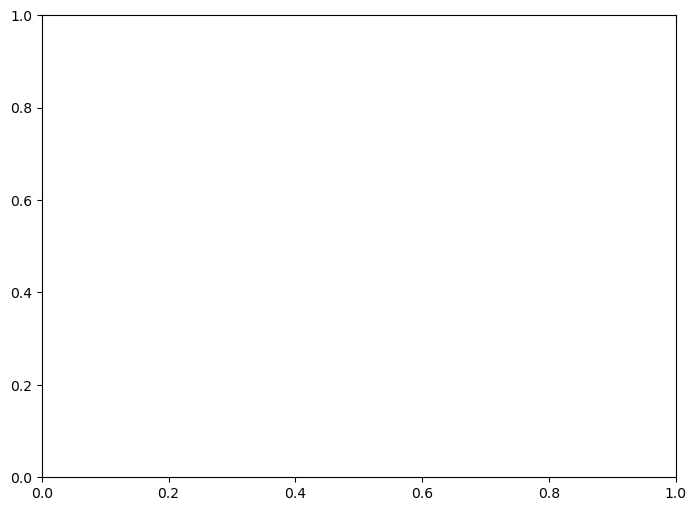

In [50]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1) 
stations_df.name.value_counts()[:10].sort_values().plot.barh()
plt.title("Top 10 city by stations",size=18)
plt.xlabel("stations")

merged_df = pd.merge(stations_df, cities_df[["city_id","name","country"]], on="city_id", how ="left")
merged_df.sample(20)



In [ ]:
systems_df.info()
systems_df[systems_df["city_id"]==69]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       488 non-null    int64 
 1   city_id  488 non-null    int64 
 2   name     287 non-null    object
dtypes: int64(2), object(1)
memory usage: 11.6+ KB


,id,city_id,name
232,261,69,National Rail
233,262,69,London Overground
234,259,69,London Underground
235,263,69,Other


In [ ]:
track_lines_df.info()
track_lines_df[track_lines_df['city_id']==69]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9757 entries, 0 to 9756
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          9757 non-null   int64 
 1   section_id  9757 non-null   int64 
 2   line_id     9757 non-null   int64 
 3   created_at  9757 non-null   object
 4   updated_at  9757 non-null   object
 5   city_id     9757 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 457.5+ KB


,id,section_id,line_id,created_at,updated_at,city_id
2536,2499,917,224,2017-11-21 00:00:00,2017-11-21 00:00:00,69
2537,2500,921,172,2017-11-21 00:00:00,2017-11-21 00:00:00,69
2538,2501,918,209,2017-11-21 00:00:00,2017-11-21 00:00:00,69
2539,2503,920,171,2017-11-21 00:00:00,2017-11-21 00:00:00,69
2540,2504,919,171,2017-11-21 00:00:00,2017-11-21 00:00:00,69
...,...,...,...,...,...,...
6470,2476,916,224,2017-11-21 00:00:00,2017-11-21 00:00:00,69
6471,2477,922,172,2017-11-21 00:00:00,2017-11-21 00:00:00,69
6472,2478,923,172,2017-11-21 00:00:00,2017-11-21 00:00:00,69
7117,3662,517,162,2017-11-21 00:00:00,2017-11-21 00:00:00,69


In [ ]:
track_df.info()
track_df.head(10)
track_df[track_df["city_id"] == 69]
track_df["geometry"][0]


def get_lat_long(x):
    if x == "LINESTRING Z EMPTY":
        return []
    else:
        x = x[:-1]
        lat_long_string= x.split('LINESTRING(')[1]
        lat_long_list = lat_long_string.split(",")
        lst = []
        for item in lat_long_list:
            lst.append(item.split(" "))
        return lst
    
track_df["Lat Long List"] = track_df["geometry"].apply(get_lat_long)
track_df["Lat Long List"].head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9271 non-null   int64  
 1   geometry       9271 non-null   object 
 2   buildstart     7663 non-null   float64
 3   opening        9250 non-null   float64
 4   closure        9240 non-null   float64
 5   length         9271 non-null   int64  
 6   city_id        9271 non-null   int64  
 7   Lat Long List  9271 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 579.6+ KB


0    [[19.0817752, 47.5005079], [19.0817355, 47.500...
1    [[16.4151057, 48.1907238], [16.4156455, 48.190...
2    [[16.4164437, 48.1839655], [16.4161534, 48.183...
3    [[16.4164901, 48.1839473], [16.416198, 48.1836...
4    [[16.415259, 48.1908074], [16.4153634, 48.1907...
5    [[16.4120893, 48.1927723], [16.4130719, 48.192...
6    [[16.412035, 48.1927423], [16.4129962, 48.1921...
7    [[16.3949694, 48.2005582], [16.3984035, 48.198...
8    [[139.387327940585, 35.3676500392482], [139.38...
9    [[139.407314018783, 35.3308431975794], [139.40...
Name: Lat Long List, dtype: object